In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import os
import scipy
from scipy import integrate
#import mpld3
%matplotlib widget

In [2]:
import sys
 
def findClosest(arr, n, target):
    left, right = 0, n - 1
    while left < right:
        if abs(arr[left] - target) <= abs(arr[right] - target):
            right -= 1
        else:
            left += 1
    return arr[left]

def flam_to_fnu(wav, flux_lam):
    return wav**2 * 1e-18 * (1/3) * flux_lam*1e-18

def fnu_to_abmag(flux_nu):
    return np.nan_to_num((-2.5 * np.log10(f_nu)) - 48.6)

def get_filter_details(filename):

    file = open('filters/'+filename, 'r')

    wavelengths = []
    throughput = []

    for line in file:
        pair = line.strip().split(' ')
        wavelengths.append(float(pair[0]))
        throughput.append(float(pair[1]))
    
    return wavelengths, throughput

def filter_corrected(filename, throughput, pivotwavsdict, main_flux, filter_wavelengths, main_wavelength):

    filt_flux = []
    filt_range = []

    if filename in pivotwavsdict:
        pivwav = pivotwavsdict[filename] * 10000

    for n in range(0, len(filter_wavelengths), 1):

        closestwav = findClosest(main_wavelength, len(main_wavelength), filter_wavelengths[n]) # closest value in main spectra wavelength to filter-covered wavelengths is closestwav

        mag = float(throughput[n] * np.array(main_flux)[np.where(main_wavelength == closestwav)[0]])

        filt_range.append(closestwav)
        filt_flux.append(mag)
    
    return filt_range, filt_flux, pivwav

#new_spectral_axis = np.concatenate([spec1.spectral_axis.value, spec2.spectral_axis.to_value(spec1.spectral_axis.unit)]) * spec1.spectral_axis.unit

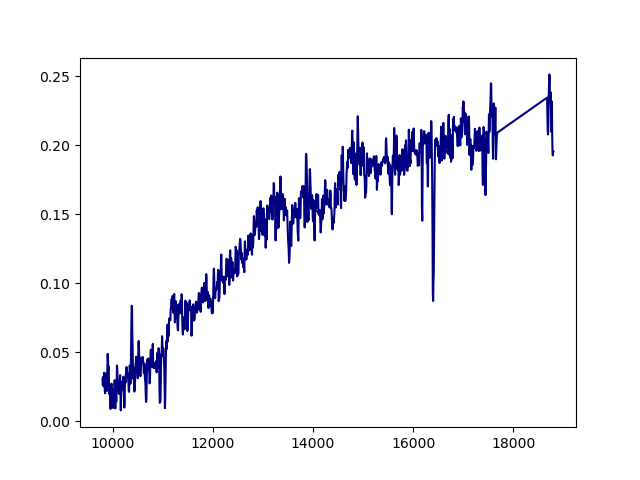

In [3]:
path = '/Users/neelsharma/Desktop/ASTRProjects/NIRSpec/wenlei_spec_4446_v3.0/l3c_4446001001_03101_s00002_00007_x1d_optimal_flam.dat'

file = open(path, 'r')
wavs = []
flux_lam = []

#for line in file:
#    line_list = []
#    line_list = line.strip().split(' ')
#    wavs.append(float(line_list[0]))
#    flux_lam.append(float(line_list[2]))

plotting = np.loadtxt(path)

mask = (plotting[:,1] > 0)

wavs = plotting[mask,0]
flux_lam = plotting[mask,1]
flux_error_lam = plotting[mask,2]

#print(len(plotting),plotting.shape)

# print(wavs.shape)
# print(flux_lam.shape)

# print(flux_lam)

#print(wavs)
#print(flux_lam) #10^-21.0 erg s^-1 cm^-2 A^-1

fig, ax = plt.subplots()

ax.plot(wavs, flux_lam, drawstyle='default', color='navy')

wavs2 = wavs
flux_lam2 = flux_lam

#lambda, map, itertools, data classes, astropy table, pandas

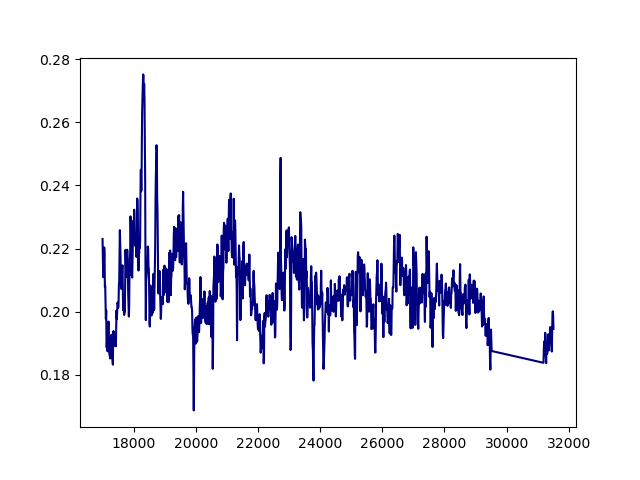

In [4]:
path = '/Users/neelsharma/Desktop/ASTRProjects/NIRSpec/wenlei_spec_4446_v3.0/l3c_4446001001_03103_s00002_00007_x1d_optimal_flam.dat'

file = open(path, 'r')
wavs = []
flux_lam = []

#for line in file:
#    line_list = []
#    line_list = line.strip().split(' ')
#    wavs.append(float(line_list[0]))
#    flux_lam.append(float(line_list[2]))

plotting = np.loadtxt(path)

mask = (plotting[:,1] > 0)

wavs = plotting[mask,0]
flux_lam = plotting[mask,1]
flux_error_lam = plotting[mask,2]

#print(len(plotting),plotting.shape)

# print(wavs.shape)
# print(flux_lam.shape)

# print(flux_lam)

#print(wavs)
#print(flux_lam) #10^-21.0 erg s^-1 cm^-2 A^-1

fig, ax = plt.subplots()

ax.plot(wavs, flux_lam, drawstyle='default', color='navy')

wavs1 = wavs
flux_lam1 = flux_lam

#lambda, map, itertools, data classes, astropy table, pandas

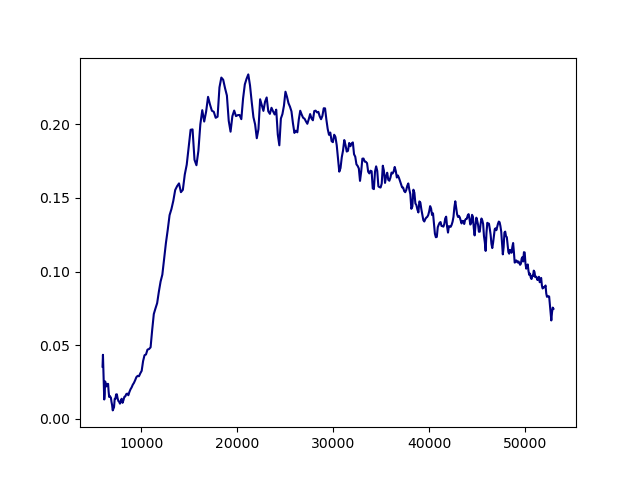

In [5]:
path = '/Users/neelsharma/Desktop/ASTRProjects/NIRSpec/wenlei_spec_4446_v3.0/l3c_4446001001_03105_s00002_00007_x1d_optimal_flam.dat'

file = open(path, 'r')
wavs = []
flux_lam = []

#for line in file:
#    line_list = []
#    line_list = line.strip().split(' ')
#    wavs.append(float(line_list[0]))
#    flux_lam.append(float(line_list[2]))

plotting = np.loadtxt(path)

mask = (plotting[:,1] > 0)

wavs = plotting[mask,0]
flux_lam = plotting[mask,1]
flux_error_lam = plotting[mask,2]

#print(len(plotting),plotting.shape)

# print(wavs.shape)
# print(flux_lam.shape)

# print(flux_lam)

#print(wavs)
#print(flux_lam) #10^-21.0 erg s^-1 cm^-2 A^-1

fig, ax = plt.subplots()

ax.plot(wavs, flux_lam, drawstyle='default', color='navy')

wavs3 = wavs
flux_lam3 = flux_lam

#lambda, map, itertools, data classes, astropy table, pandas

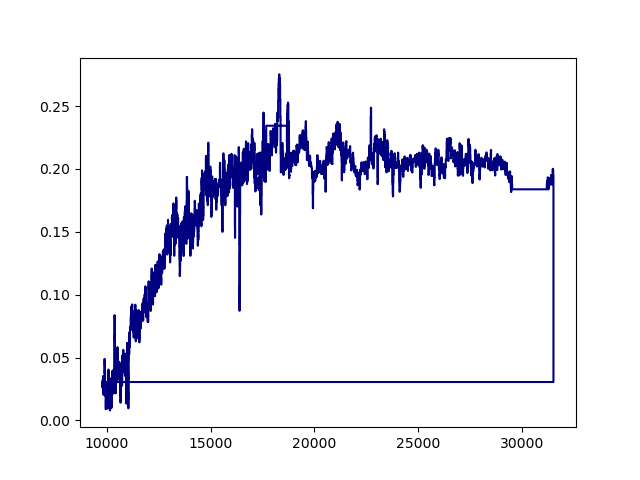

In [6]:
flux_dict = {}
flux_dict1 = {wavs1[i]: flux_lam1[i] for i in range(len(wavs1))}
flux_dict2 = {wavs2[i]: flux_lam2[i] for i in range(len(wavs2))}
#flux_dict3 = {wavs3[i]: flux_lam3[i] for i in range(len(wavs3))}

flux_dict.update(flux_dict1)
flux_dict.update(flux_dict2)
#flux_dict.update(flux_dict3)

# print(flux_dict)

wavs = []
flux_lam = []

for key, value in flux_dict.items():
    wavs.append(key)
    flux_lam.append(value)

wavs = np.array(wavs)
flux_lam = np.array(flux_lam)

fig, ax = plt.subplots()

ax.plot(wavs, flux_lam, drawstyle='steps', color='navy')

In [7]:
f_nu = flam_to_fnu(wavs, flux_lam)
ab_mag = fnu_to_abmag(f_nu)

# print('\nWavelength')
# print(wavs)

# print('F𝜈:') #10^-29.0 erg s^-1 cm^-2 Hz^-1
# print(f_nu)

# print('\nAB Mag:') #Mag
# print(ab_mag)

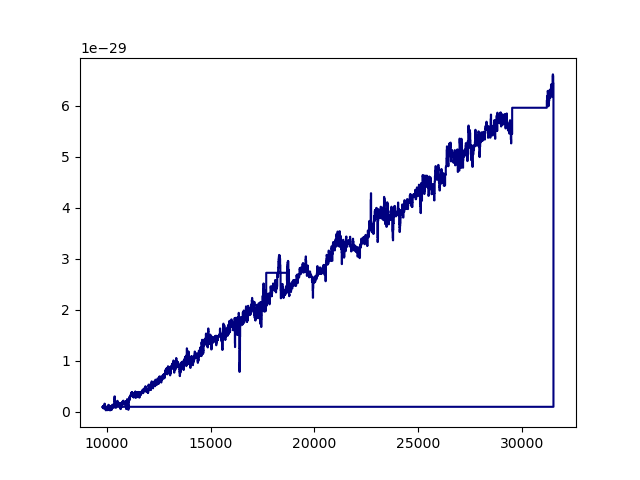

In [8]:
fig, ax = plt.subplots()

ax.plot(wavs, f_nu, drawstyle='steps', color='navy')

/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_66585/795271772.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mag = float(throughput[n] * np.array(main_flux)[np.where(main_wavelength == closestwav)[0]])



Filename: 		JWST_NIRCam.F277W.dat
IntegrationLam: 	2.0045872050235319e-19
IntegrationAB: 		19.730854083762374

Filename: 		JWST_NIRCam.F200W.dat
IntegrationLam: 	2.118258044412803e-19
IntegrationAB: 		20.401609486183965

Filename: 		JWST_NIRCam.F115W.dat
IntegrationLam: 	7.924895409352523e-20
IntegrationAB: 		22.652309137027025

Filename: 		JWST_NIRCam.F090W.dat
IntegrationLam: 	2.583086083887937e-20
IntegrationAB: 		24.406850875028972

Filename: 		JWST_NIRCam.F356W.dat
IntegrationLam: 	1.9175995257305425e-19
IntegrationAB: 		19.24484813339904

Filename: 		JWST_NIRCam.F150W.dat
IntegrationLam: 	1.769696486716541e-19
IntegrationAB: 		21.209171596202218


/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_66585/2487888103.py:48: RuntimeWarning: invalid value encountered in scalar divide
  integrated_fluxlam = (scipy.integrate.trapezoid(filt_flux, filt_range)/scipy.integrate.trapezoid(through, filt_range)) * 1e-18



Filename: 		JWST_NIRCam.F410M.dat
IntegrationLam: 	nan
IntegrationAB: 		nan

Filename: 		JWST_NIRCam.F444W.dat
IntegrationLam: 	nan
IntegrationAB: 		nan


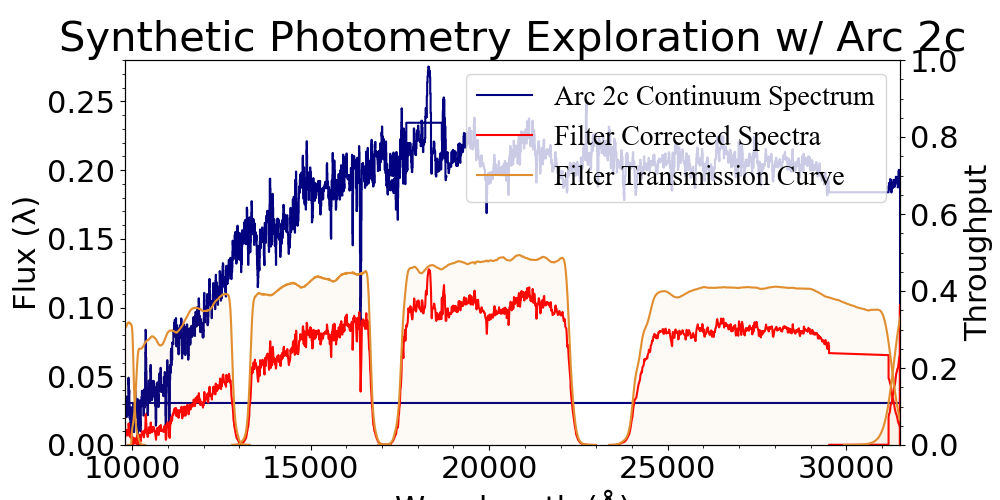

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

flux = flux_lam
wavs = wavs

plt.xscale('linear')
plt.yscale('linear')

Con, = ax.plot(wavs, flux, drawstyle='steps', color='navy', label='Arc 2c Continuum Spectrum')

# FILTER PLOTTING

filters = '''   JWST_NIRCam.F090W.dat
                JWST_NIRCam.F115W.dat
                JWST_NIRCam.F150W.dat
                JWST_NIRCam.F200W.dat
                JWST_NIRCam.F277W.dat
                JWST_NIRCam.F356W.dat
                JWST_NIRCam.F444W.dat
                JWST_NIRCam.F410M.dat
'''

pivotwavsdict = {'JWST_NIRCam.F090W.dat' : 0.901,
                'JWST_NIRCam.F115W.dat' : 1.154,
                'JWST_NIRCam.F150W.dat' : 1.501,
                'JWST_NIRCam.F200W.dat' : 1.990,
                'JWST_NIRCam.F277W.dat' : 2.786,
                'JWST_NIRCam.F356W.dat' : 3.563,
                'JWST_NIRCam.F444W.dat' : 4.421,
                'JWST_NIRCam.F410M.dat' : 4.092}

ax2 = ax.twinx()

for filename in os.listdir('filters/'):
    if filename in filters:
        
        wavsrange, through = get_filter_details(filename)
        
        Filt, = ax2.plot(wavsrange, through, color='#E08E2F', label='Filter Transmission Curve')
        ax2.fill_between(wavsrange, through, color='#E08E2F', alpha=0.05)

        # FILTER INTEGRATION

        filt_range, filt_flux, pivwav = filter_corrected(filename, through, pivotwavsdict, flux, wavsrange, wavs)

        Integ, = ax.plot(filt_range, filt_flux, color='red', label='Filter Corrected Spectra')

        integrated_fluxlam = (scipy.integrate.trapezoid(filt_flux, filt_range)/scipy.integrate.trapezoid(through, filt_range)) * 1e-18
        integrated_fluxnu =  ((pivwav**2) * 2.99e-18) * integrated_fluxlam
        integrated_fluxAB = -2.5 * np.log10(integrated_fluxnu) - 48.6

        print('\nFilename: \t\t' + filename)
        print('IntegrationLam: \t' + str(integrated_fluxlam))
        print('IntegrationAB: \t\t' + str(integrated_fluxAB))


ax2.set_ylabel('Throughput', fontsize=22)

ax2.set_ylim(0, 1)
ax2.set_xlim(15000, 32000)

ax.set_xlabel('Wavelength (Å)', fontsize=22)
ax.set_ylabel('Flux (λ)', fontsize=22)

ax.set_ylim(0, 0.28) #(22.6, 25.4)
ax.set_xlim(np.min(wavs), np.max(wavs))

# TICK ADJUSTMENTS

ax.minorticks_on()
ax.tick_params(labelsize=22)
ax2.minorticks_on()
ax2.tick_params(labelsize=22)
plt.rcParams.update({'font.serif': "Times New Roman",
                     'font.family': "serif"                  
                    })

ax.legend(handles=[Con, Integ, Filt], loc='upper right', prop={'family': 'Times New Roman', 'size': '20'})
plt.title('Synthetic Photometry Exploration w/ Arc 2c', fontsize=30)
plt.show()

In [10]:
new_lam = []
for i in range(0, len(flux_lam), 1):
    new_lam.append(flux_lam[i] * 1e-17)

np.mean(new_lam)

1.7243007848718994e-18

In [11]:
for filename in os.listdir('filters/'):
    if filename in filters:
        file = open('filters/'+filename, 'r')

        wavsrange = []
        through = []

        for line in file:
            pair = line.strip().split(' ')
            wavsrange.append(float(pair[0]))
            through.append(float(pair[1]))

        wavelength = wavsrange[-1]
        filt_flux[filt_range.index(wavelength)]

scipy.integrate.trapz(flux1_trans_corr_lamda, wave1_trans_corr)/scipy.integrate.trapz(trans_lamda, wave1_trans_corr)

ValueError: 33014.6 is not in list